In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [20]:
data = pd.read_csv("bacteria.csv")

In [21]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


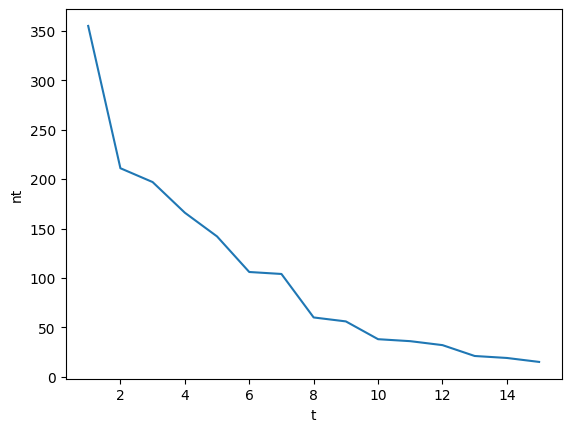

In [22]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [23]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

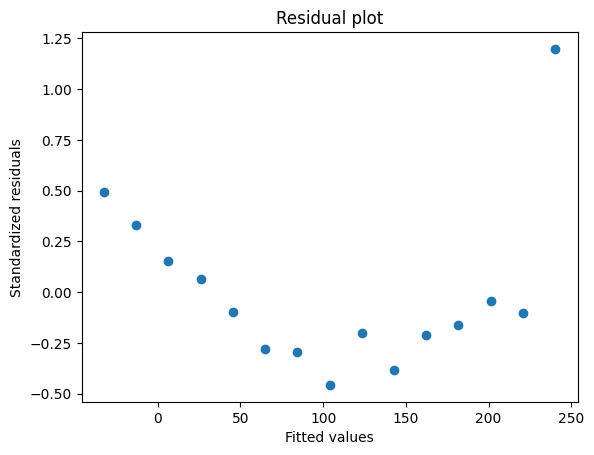

In [24]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

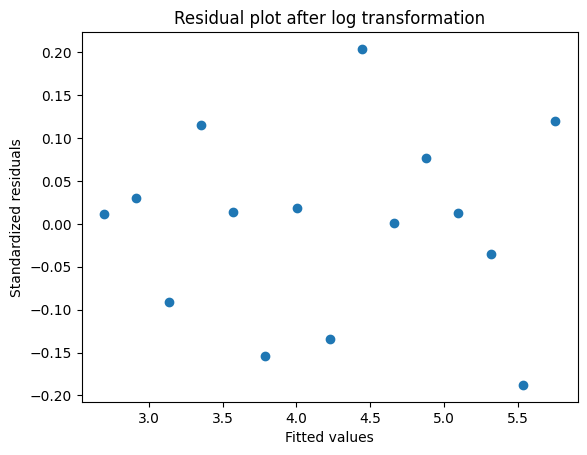

In [25]:
# 데이터 로그 변환
data['log_nt'] = np.log(data['nt'])

# 변환된 데이터에 대해 회귀 분석 수행
model = LinearRegression()
model.fit(data[['t']], data['log_nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['log_nt'] - fitted_values) / data['log_nt'].std()

# Residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot after log transformation')
plt.show()

### Q2

In [26]:
# 데이터 로드
data2 = pd.read_csv("artificial1.csv")

In [27]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [28]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [29]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        14:52:22   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

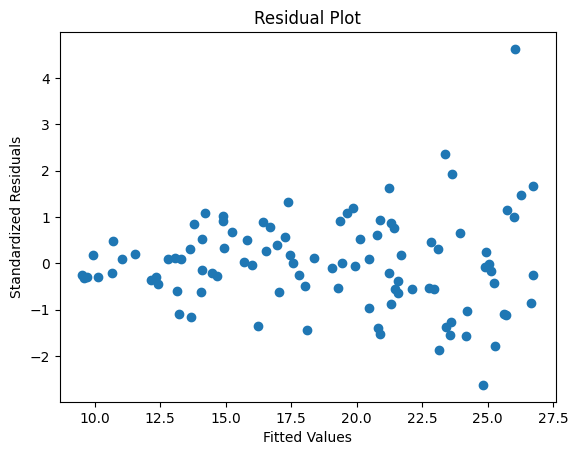

In [33]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     33.13
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           9.87e-08
Time:                        15:06:00   Log-Likelihood:                -149.39
No. Observations:                 100   AIC:                             302.8
Df Residuals:                      98   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9357      0.304      9.668      0.0

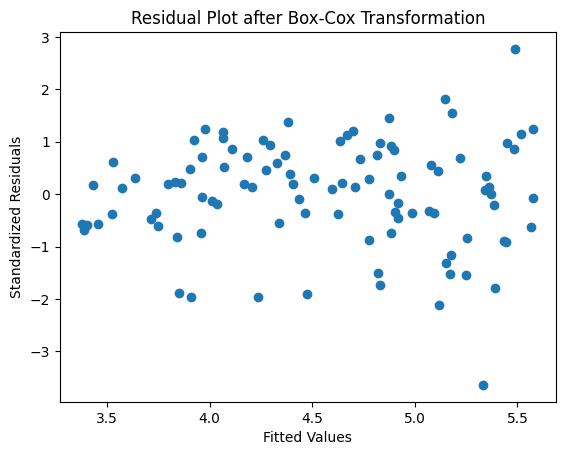

In [43]:
from scipy.stats import boxcox

# 데이터 로드
data2 = pd.read_csv("artificial1.csv")

# Box-Cox 변환 적용
data2['Y'], fitted_lambda = boxcox(data2['Y'])

# Box-Cox 변환된 데이터에 대한 선형 회귀 모형 적합
model = smf.ols('Y ~ X', data=data2).fit()

# 예측값과 잔차 계산
fitted_values = model.predict(data2['X'])
residuals = model.resid

# 잔차의 표준화
standardized_residuals = residuals / np.std(residuals)

# 모델 요약 정보 출력
print(model.summary())

# Residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot after Box-Cox Transformation')
plt.show()

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans : 단순 회귀 모델에서 등분산성이 위배되는 것은 회귀 분석의 중요한 가정 중 하나가 충족되지 않는 것을 의미합니다. 등분산성은 잔차의 분산이 일정함을 가정하는데, 만약 이 가정이 위배되면 오류가 잘못 추정되어 신뢰 구간 및 검정 결과가 왜곡될 수 있습니다. 회귀 모형의 신뢰성을 저하시켜 예측 및 해석의 정확도를 떨어뜨릴 수 있습니다.